In [2]:
from linear_algebra import squared_distance, vector_mean, distance
import math, random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [3]:
class KMeans:
    """performs k-means clustering"""
    
    def __init__(self, k):
        self.k = k # number of clusters
        self.means = None # means of clusters
    def classify(self, input):
        """return the index of the cluster closest to the input"""
        return min(range(self.k),
                key=lambda i: squared_distance(input, self.means[i]))
    def train(self, inputs):
        self.means = random.sample(inputs, self.k)
        assignments = None
        while True:
            # Find new assignments
            new_assignments = list(map(self.classify, inputs))
            
            # If no assignments have changed, we're done.
            if assignments == new_assignments:
                return
        # Otherwise keep the new assignments,
        assignments = new_assignments
        
        for i in range(self.k):
            i_points = [p for p, a in zip(inputs, assignments) if a == i]
            # avoid divide-by-zero if i_points is empty
            if i_points:
                self.means[i] = vector_mean(i_points)


In [4]:
data = [[-14,-5],[13,13],[20,23],[-19,-11],[-9,-16],[21,27],[-49,15],[26,13],[
-46,5],[-34,-1],[11,15],[-49,0],[-22,-16],[19,28],[-12,-8],[-13,-19],[-41,8],[
-11,-6],[-25,-9],[-18,-3]]

In [1]:
# # random.seed(0) # so you get the same results as me
# random.seed(1) 
# clusterer = KMeans(1)
# clusterer.train(data)

In [ ]:
# print("2-means:")
# print(clusterer.means)
# my_clusters = [clusterer.classify(p) for p in data]
# colormap = 'bgrcmyk'
# my_color = list(map(lambda i: colormap[i], my_clusters))
# x, y = zip(*data)
# plt.scatter(x, y, color=my_color)
# xc, yc = zip(*clusterer.means)
# plt.scatter(xc, yc, marker='s')
# plt.axis('equal')
# plt.show()

Choosing k


In [ ]:
# def squared_clustering_errors(inputs, k):
#     """finds the total squared error from k-means clustering the inputs"""
#     clusterer = KMeans(k)
#     clusterer.train(inputs)
#     means = clusterer.means
#     assignments = list(map(clusterer.classify, inputs))
#     return sum(squared_distance(input,means[cluster])
#             for input, cluster in zip(inputs, assignments))
# ks = range(1, len(data) + 1)
# errors = [squared_clustering_errors(data, k) for k in ks]
# plt.plot(ks, errors)
# plt.xticks(ks)
# plt.xlabel("k")
# plt.ylabel("total squared error")
# plt.show()

In [9]:
# path_to_png_file = "image.png"
# import matplotlib.image as mpimg
# img = mpimg.imread(path_to_png_file)
# plt.imshow(img)
# plt.axis('off')
# plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'image.png'

In [ ]:
#  top_row = img[0]
# top_left_pixel = top_row[0]

Bottom-up Hierarchical Clustering

In [10]:
# leaf1 = ([10, 20],) # to make a 1-tuple you need the trailing comma
# leaf2 = ([30, -15],) # otherwise Python treats the parentheses as parenthe
# ses

NameError: name 'ses' is not defined

KMeans in sklearn.cluster

In [5]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
 [10, 2], [10, 4], [10, 0]])

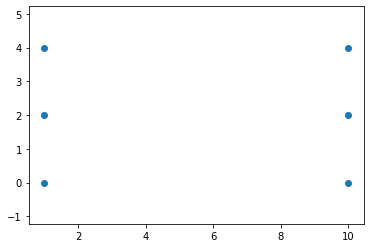

In [6]:
plt.scatter(X[:,0], X[:,1])
plt.axis('equal')
plt.show()

In [7]:
 kmeans = KMeans(n_clusters=2).fit(X)
kmeans.labels_

array([0, 0, 0, 1, 1, 1])

In [8]:
kmeans.predict([[0, 0], [12, 3]])

array([0, 1])

In [9]:
kmeans.cluster_centers_

array([[ 1.,  2.],
       [10.,  2.]])

Agglomerative Clustering in sklearn.cluster

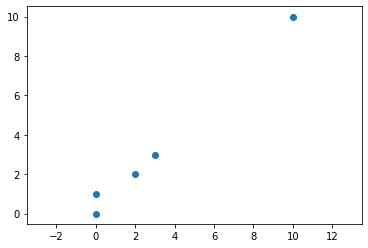

In [10]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
X = np.array([[0,0], [0, 1], [2, 2],[3,3], [10,10]])
plt.scatter(X[:,0], X[:,1])
plt.axis('equal')
plt.show()

In [11]:
clustering = AgglomerativeClustering(n_clusters=2, linkage='average').fit(X)
clustering

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=2)

In [14]:
clustering.labels_

array([0, 0, 0, 0, 1], dtype=int64)

Plot dendrogram


In [15]:
from scipy.spatial.distance import pdist
y = pdist(X)

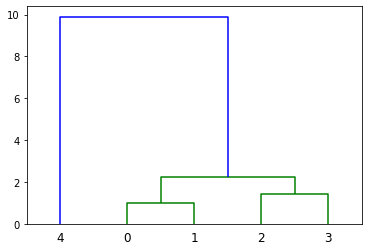

In [16]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy
Z = hierarchy.linkage(y, 'single')
dn = hierarchy.dendrogram(Z)

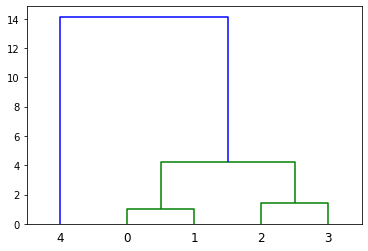

In [17]:
Z = hierarchy.linkage(y, 'complete')
dn = hierarchy.dendrogram(Z)

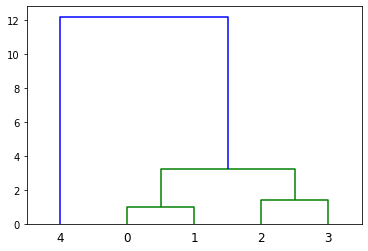

In [18]:
Z = hierarchy.linkage(y, 'average')
dn = hierarchy.dendrogram(Z)